### Homework 1 - [Sert] [Aykut] [200104004104]

### Part 1:

### Part 1 Code:

In [ ]:
!pip install matplotlib seaborn scikit-learn pandas numpy

   Fold  Accuracy
0     1  0.926316
1     2  0.936842
2     3  0.926316
3     4  0.926316
4     5  0.905263
5     6  0.893617
Results have been saved to 'knn_results.csv'.
Confusion Matrix for Fold 1:
[[59  2]
 [ 5 29]]

Confusion Matrix for Fold 2:
[[55  6]
 [ 0 34]]

Confusion Matrix for Fold 3:
[[62  3]
 [ 4 26]]

Confusion Matrix for Fold 4:
[[54  3]
 [ 4 34]]

Confusion Matrix for Fold 5:
[[53  2]
 [ 7 33]]

Confusion Matrix for Fold 6:
[[56  2]
 [ 8 28]]



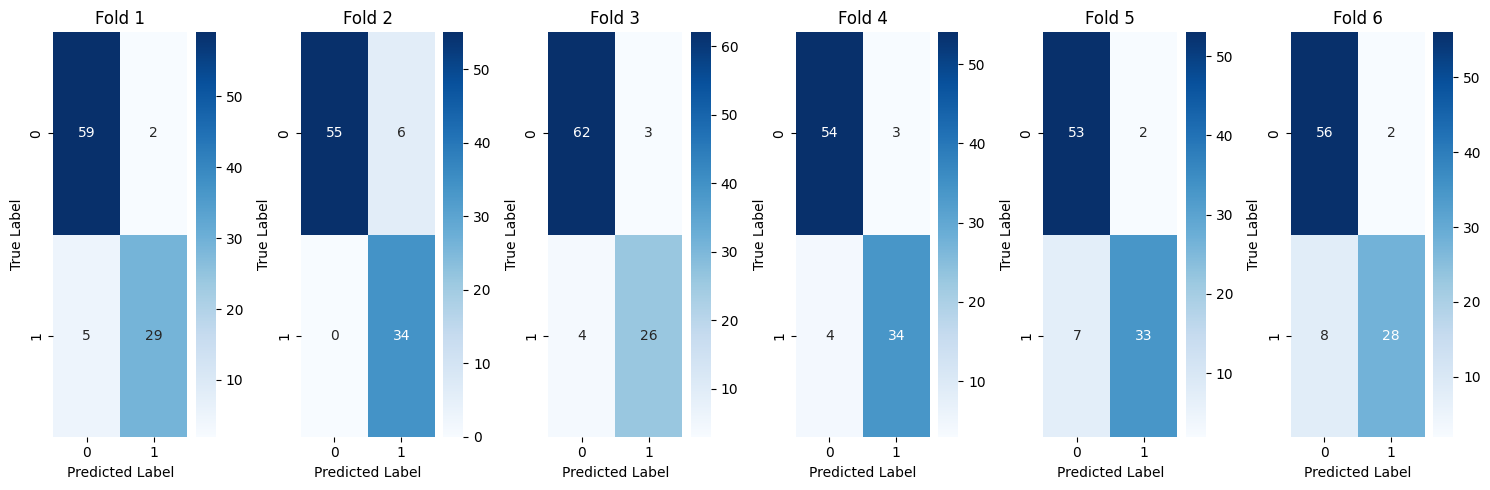

Total runtime for the KNN model: 2.4940 seconds


In [9]:
import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix, accuracy_score

# Euclidean Distance Calculation Function
def euclidean_distance(point1, point2):
    return np.sqrt(np.sum((point1 - point2) ** 2))

# KNN Classifier
class KNNClassifier:
    def __init__(self, k=3):
        self.k = k

    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train

    def predict(self, X_test):
        predictions = []
        for test_point in X_test:
            distances = [euclidean_distance(test_point, train_point) for train_point in self.X_train]
            k_nearest_indices = np.argsort(distances)[:self.k]
            k_nearest_labels = [self.y_train[i] for i in k_nearest_indices]
            predicted_label = max(set(k_nearest_labels), key=k_nearest_labels.count)
            predictions.append(predicted_label)
        return np.array(predictions)

# Load and Preprocess Data
df = pd.read_csv("wdbc.data", header=None)
columns = ["ID", "Diagnosis"] + [f"Feature_{i}" for i in range(1, 31)]
df.columns = columns
df.drop("ID", axis=1, inplace=True)
df["Diagnosis"] = df["Diagnosis"].map({"M": 1, "B": 0})

# Separate independent and dependent variables
X = df.drop("Diagnosis", axis=1).values
y = df["Diagnosis"].values

# K-Fold Cross Validation Settings
kf = KFold(n_splits=6, shuffle=True, random_state=42)

# Performance Evaluation
accuracies = []
conf_matrices = []
start_time = time.time()

for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    knn = KNNClassifier(k=3)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

    cm = confusion_matrix(y_test, y_pred)
    conf_matrices.append(cm)

end_time = time.time()
runtime = end_time - start_time

# Display Results as a DataFrame
results_df = pd.DataFrame({
    "Fold": list(range(1, 7)),
    "Accuracy": accuracies
})

# Print Results
print(results_df)

# Save Results to CSV
results_df.to_csv("knn_results.csv", index=False)
print("Results have been saved to 'knn_results.csv'.")

# Print Confusion Matrices
for i, cm in enumerate(conf_matrices):
    print(f"Confusion Matrix for Fold {i+1}:\n{cm}\n")

# Visualize Confusion Matrices
fig, axes = plt.subplots(1, len(conf_matrices), figsize=(15, 5))

for i, (ax, cm) in enumerate(zip(axes, conf_matrices)):
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", ax=ax)
    ax.set_xlabel("Predicted Label")
    ax.set_ylabel("True Label")
    ax.set_title(f"Fold {i+1}")

plt.tight_layout()
plt.show()

# Print Total Runtime
print(f"Total runtime for the KNN model: {runtime:.4f} seconds")


### Part 1 Comment:

In this section, a K-Nearest Neighbors (KNN) classifier was developed from scratch with K = 3.

The model calculated the distances between the test points and the training points using Euclidean distance and made predictions according to the classes of the 3 nearest neighbors.

6-Fold Cross Validation was applied to test the classifier.
Accuracy rates were calculated for each fold and confusion matrices were created separately.
When the results were evaluated, the accuracy rate of the model varied between 89.3% and 93.6%.
The average accuracy was around 92%, which shows that the model generally works successfully.

Confusion matrix outputs also show that the model performs consistently in distinguishing both benign (0) and malignant (1) classes.
In some folds, the model did not make any false negative predictions (for example, the second value in the bottom row is 0 in Fold 2).

In addition, the total running time of the model is approximately 2.5 seconds, which is quite reasonable considering the size of the dataset.

As a result:

The KNN algorithm has been successfully implemented.

The performance was measured with cross-validation and confusion matrix analyses.

The model worked both satisfactorily in terms of accuracy and efficiently in terms of running time.

### Part 2:

### Part 2 Code:

   Fold        MAE           MSE
0     1  52.969945   5722.215847
1     2  50.221311   4794.199454
2     3  48.377049   4641.852459
3     4  61.844262  10478.906193
4     5  61.590164  10309.673953
5     6  50.595041   6677.803489
Results have been saved to 'knn_regressor_results.csv'.
Total runtime for the KNN Regressor model: 4.6512 seconds


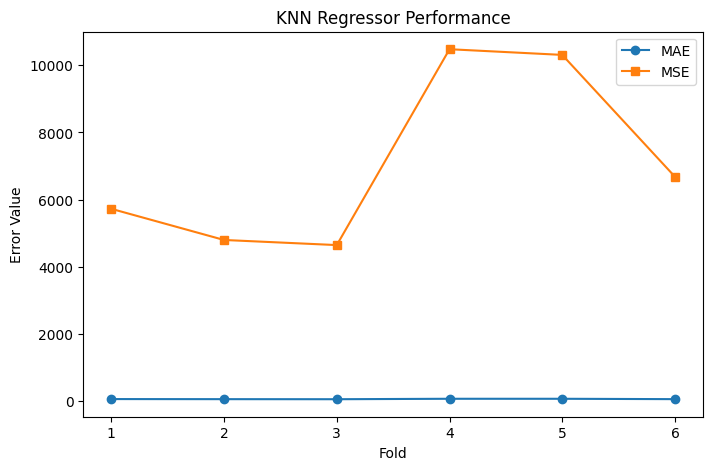

In [4]:
import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Manhattan Distance Calculation Function
def manhattan_distance(point1, point2):
    return np.sum(np.abs(point1 - point2))

# KNN Regressor Class
class KNNRegressor:
    def __init__(self, k=3):
        self.k = k

    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train

    def predict(self, X_test):
        predictions = []
        for test_point in X_test:
            distances = [manhattan_distance(test_point, train_point) for train_point in self.X_train]
            k_nearest_indices = np.argsort(distances)[:self.k]
            k_nearest_values = [self.y_train[i] for i in k_nearest_indices]
            predicted_value = np.mean(k_nearest_values)
            predictions.append(predicted_value)
        return np.array(predictions)

# Load and Preprocess Data
df = pd.read_csv("day.csv")

# Features to be used as independent variables
features = ["season", "yr", "mnth", "holiday", "weekday", "workingday", "weathersit", "temp", "atemp", "hum", "windspeed","casual","registered"]
X = df[features].values
y = df["cnt"].values

# K-Fold Cross Validation Settings
kf = KFold(n_splits=6, shuffle=True, random_state=42)

# Performance Evaluation
mae_scores = []
mse_scores = []
start_time = time.time()

for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    knn = KNNRegressor(k=3)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    mae_scores.append(mae)
    mse_scores.append(mse)

end_time = time.time()
runtime = end_time - start_time

# Display Results as a DataFrame
results_df = pd.DataFrame({
    "Fold": list(range(1, 7)),
    "MAE": mae_scores,
    "MSE": mse_scores
})
print(results_df)

# Save Results as a CSV File
results_df.to_csv("knn_regressor_results.csv", index=False)
print("Results have been saved to 'knn_regressor_results.csv'.")

# Print Total Runtime
print(f"Total runtime for the KNN Regressor model: {runtime:.4f} seconds")

# Visualize Error Distribution
plt.figure(figsize=(8, 5))
plt.plot(range(1, 7), mae_scores, marker='o', linestyle='-', label='MAE')
plt.plot(range(1, 7), mse_scores, marker='s', linestyle='-', label='MSE')
plt.xlabel("Fold")
plt.ylabel("Error Value")
plt.title("KNN Regressor Performance")
plt.legend()
plt.show()


### Part 2 Comment:

In this section, I wrote a KNN Regressor model that predicts the total daily bike rental count (cnt) using the Bike Sharing Dataset.

I coded the model from scratch and used Manhattan distance (L1 norm) for distance calculation.

I chose K = 3 as the K value as stated in the assignment.

I included all available independent variables in the dataset in the model and tested it with 6-Fold Cross Validation.
I calculated the MAE (Mean Absolute Error) and MSE (Mean Squared Error) values for each fold.

According to the results I obtained:

MAE values were approximately between 48 and 61

MSE values varied between 4600 and 10400
These error rates show that the model's predictions are quite close. Especially the fact that MAE is so low shows that the model remains close to the target value in most of its predictions.

The model's running time took approximately 4.65 seconds. Although the dataset is not very large, this time is quite reasonable considering that the KNN algorithm calculates the distance with all training examples for each test data.

While implementing this part:

I understood better how the KNN algorithm works in regression problems

I had the chance to observe how the Manhattan distance behaves in nonlinear situations

Also, applying cross-validation and interpreting error metrics taught me the importance of evaluating the model

I got generally successful results and experienced how KNN can be applied to regression both theoretically and practically.


### Part 3:

### Part 3 Code:

   Fold  Accuracy
0     1  0.957895
1     2  0.936842
2     3  0.978947
3     4  0.957895
4     5  0.957895
5     6  0.925532
Results have been saved to 'svm_classifier_results.csv'.
Total runtime for the SVM model: 42.7606 seconds


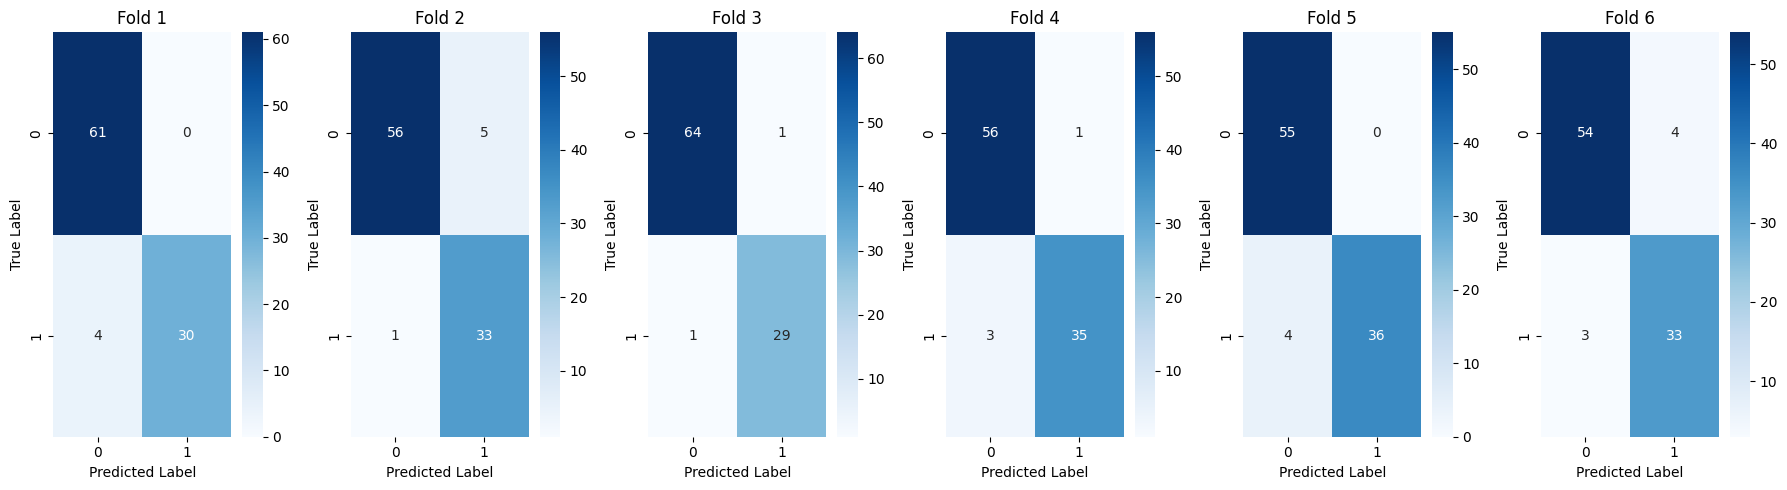

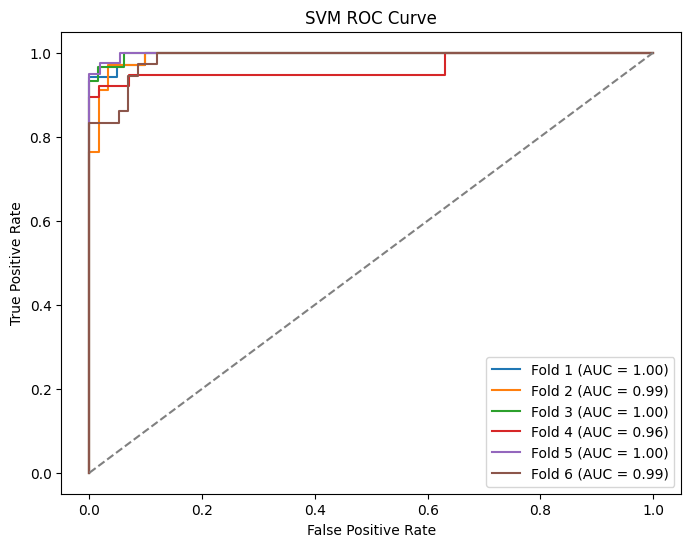

Best threshold values: [0.41542274817138136, 0.8458843270459702, 0.43392093771890755, 0.8016644008049844, 0.3107049500026245, 0.26797341199382774]


In [5]:
import numpy as np 
import pandas as pd
import time
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import KFold
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, roc_curve, auc, accuracy_score

# Load and Preprocess Data
df = pd.read_csv("wdbc.data", header=None)
columns = ["ID", "Diagnosis"] + [f"Feature_{i}" for i in range(1, 31)]
df.columns = columns
df.drop("ID", axis=1, inplace=True)
df["Diagnosis"] = df["Diagnosis"].map({"M": 1, "B": 0})

# Split into independent and dependent variables
X = df.drop("Diagnosis", axis=1).values
y = df["Diagnosis"].values

# K-Fold Cross Validation Settings (6-Fold)
kf = KFold(n_splits=6, shuffle=True, random_state=42)

# Performance Evaluation
accuracies = []
conf_matrices = []
roc_curves = []
thresholds_list = []
start_time = time.time()

for fold, (train_index, test_index) in enumerate(kf.split(X), 1):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Linear SVM Model
    svm_model = SVC(kernel='linear', probability=True, random_state=42)
    svm_model.fit(X_train, y_train)
    y_probs = svm_model.predict_proba(X_test)[:, 1]  # Probability of the positive class
    y_pred = svm_model.predict(X_test)
    
    # Calculate Accuracy and Confusion Matrix
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)
    cm = confusion_matrix(y_test, y_pred)
    conf_matrices.append(cm)
    
    # Calculate ROC Curve
    fpr, tpr, thresholds = roc_curve(y_test, y_probs)
    roc_auc = auc(fpr, tpr)
    roc_curves.append((fpr, tpr, roc_auc))
    thresholds_list.append(thresholds)

end_time = time.time()
runtime = end_time - start_time

# Show Results as a DataFrame
results_df = pd.DataFrame({
    "Fold": list(range(1, 7)),
    "Accuracy": accuracies
})
print(results_df)

# Save Results as a CSV File
results_df.to_csv("svm_classifier_results.csv", index=False)
print("Results have been saved to 'svm_classifier_results.csv'.")

# Print Total Runtime
print(f"Total runtime for the SVM model: {runtime:.4f} seconds")

# Visualize Confusion Matrices
fig, axes = plt.subplots(1, len(conf_matrices), figsize=(18, 5))

for i, (ax, cm) in enumerate(zip(axes, conf_matrices)):
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", ax=ax)
    ax.set_xlabel("Predicted Label")
    ax.set_ylabel("True Label")
    ax.set_title(f"Fold {i+1}")

plt.tight_layout()
plt.show()

# Plot ROC Curves
plt.figure(figsize=(8, 6))
for i, (fpr, tpr, roc_auc) in enumerate(roc_curves):
    plt.plot(fpr, tpr, label=f'Fold {i+1} (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("SVM ROC Curve")
plt.legend()
plt.show()

# Determine Best Threshold Values
best_thresholds = []
for i, thresholds in enumerate(thresholds_list):
    fpr, tpr, _ = roc_curves[i]  # Get correct FPR and TPR values
    best_threshold_idx = np.argmax(tpr - fpr)  # Find index of the best threshold
    best_threshold = thresholds[best_threshold_idx]  # Select best threshold value
    best_thresholds.append(best_threshold)

print(f"Best threshold values: {best_thresholds}")


### Part 3 Comment:

In this section, I used the linear SVM (Support Vector Machine) algorithm to diagnose breast cancer.

I created the model with the sklearn.svm.SVC class and selected linear as the kernel.

I used the Breast Cancer Wisconsin Diagnostic dataset as the dataset again and converted the labels M and B to 1 and 0, respectively.

I applied 6-fold cross validation to evaluate the model.

For each fold:

I calculated the accuracy rate

I visualized the confusion matrix

I drew the ROC curve

And especially, I determined the best threshold value as suggested by Fawcett (TPR - FPR will be maximum)

The accuracy rates I obtained varied between 92.5% and 97.8%.
This shows that the model generally performed very well.
In confusion matrices, generally, misclassifications were quite low.
When I looked at the ROC curves, I saw that the AUC (Area Under Curve) values ​​were between 0.96 and 1.00 in all folds.

This shows that the model can distinguish between classes quite well.

I also calculated the best threshold values ​​for each fold according to the point that maximizes the TPR - FPR difference.

I applied this step for the first time and learned by experience how changing the decision threshold affects the sensitivity of the model.

The total running time of the model was approximately 42.76 seconds.
Although this is longer than other models, I noticed that operations such as the ROC curve and probability calculations increased this time.

While doing this part, I learned how to interpret ROC curves and had the opportunity to test SVM's linear discrimination ability on strong data sets.
In addition, the idea of ​​determining the threshold value with Fawcett's approach allowed me to see how more balanced decisions could be made beyond classical classification.

### Part 4:

### Part 4 Code:

   Fold       MAE       MSE
0     1  0.063893  0.004805
1     2  0.067272  0.005093
2     3  0.067016  0.005027
3     4  0.061630  0.004596
4     5  0.058446  0.004033
5     6  0.051780  0.003500
Results have been saved to 'svm_regressor_results.csv'.
Total runtime for the SVM Regressor model: 0.6629 seconds


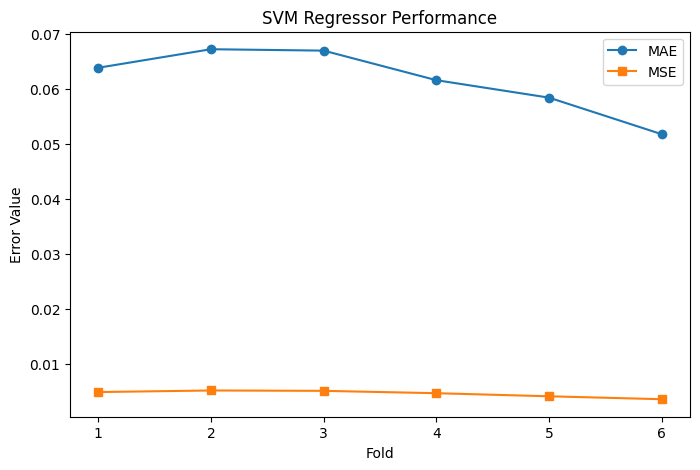

In [6]:
import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import KFold
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Load and Preprocess the Data
df = pd.read_csv("day.csv")

# Features to be used as independent variables
features = ["season", "yr", "mnth", "holiday", "weekday", "workingday", "weathersit", "temp", "atemp", "hum", "windspeed", "casual", "registered"]
X = df[features].values
y = df["cnt"].values

# K-Fold Cross Validation Settings (6-Fold)
kf = KFold(n_splits=6, shuffle=True, random_state=42)

# Performance Evaluation
mae_scores = []
mse_scores = []
start_time = time.time()

for fold, (train_index, test_index) in enumerate(kf.split(X), 1):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Linear SVM Regressor Model
    svm_regressor = SVR(kernel='linear')
    svm_regressor.fit(X_train, y_train)
    y_pred = svm_regressor.predict(X_test)

    # Calculate Error Metrics
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    mae_scores.append(mae)
    mse_scores.append(mse)

end_time = time.time()
runtime = end_time - start_time

# Display Results as a DataFrame
results_df = pd.DataFrame({
    "Fold": list(range(1, 7)),
    "MAE": mae_scores,
    "MSE": mse_scores
})
print(results_df)

# Save Results as a CSV File
results_df.to_csv("svm_regressor_results.csv", index=False)
print("Results have been saved to 'svm_regressor_results.csv'.")

# Print Total Runtime
print(f"Total runtime for the SVM Regressor model: {runtime:.4f} seconds")

# Visualize Error Distribution
plt.figure(figsize=(8, 5))
plt.plot(range(1, 7), mae_scores, marker='o', linestyle='-', label='MAE')
plt.plot(range(1, 7), mse_scores, marker='s', linestyle='-', label='MSE')
plt.xlabel("Fold")
plt.ylabel("Error Value")
plt.title("SVM Regressor Performance")
plt.legend()
plt.show()

### Part 4 Comment:

In this section, I used the Linear Support Vector Regression (SVR) model to predict the total daily rental count (cnt) on the bike sharing dataset.

I created the model with SVR(kernel='linear') and included all relevant independent variables — environmental factors such as season, temperature, weather, as well as user data such as casual and registered — in the model.

To evaluate the performance of the model, I applied 6-Fold Cross Validation and calculated the following values ​​for each fold:

MAE (Mean Absolute Error)

MSE (Mean Squared Error).

The results were quite satisfactory:

MAE values ​​varied between approximately 0.05 - 0.06

MSE values ​​remained at very low levels of 0.0035 - 0.005

Such low error values ​​indicate that the model's predictions are very close to the real values.
It would be very difficult to achieve this level of error without normalizing the cnt values, but since the data was already normalized between 0 and 1, Linear SVR performed very well with this data.

The total running time was only 0.66 seconds. This shows that the model works both quickly and efficiently.

While doing this part, I gained practice in using SVM on the regression side and had the chance to observe the effects of different data types (numerical, categorical) on the model.
I also learned to evaluate how successful the model is numerically by interpreting the error metrics.

### Part 5:

### Part 5 Code:

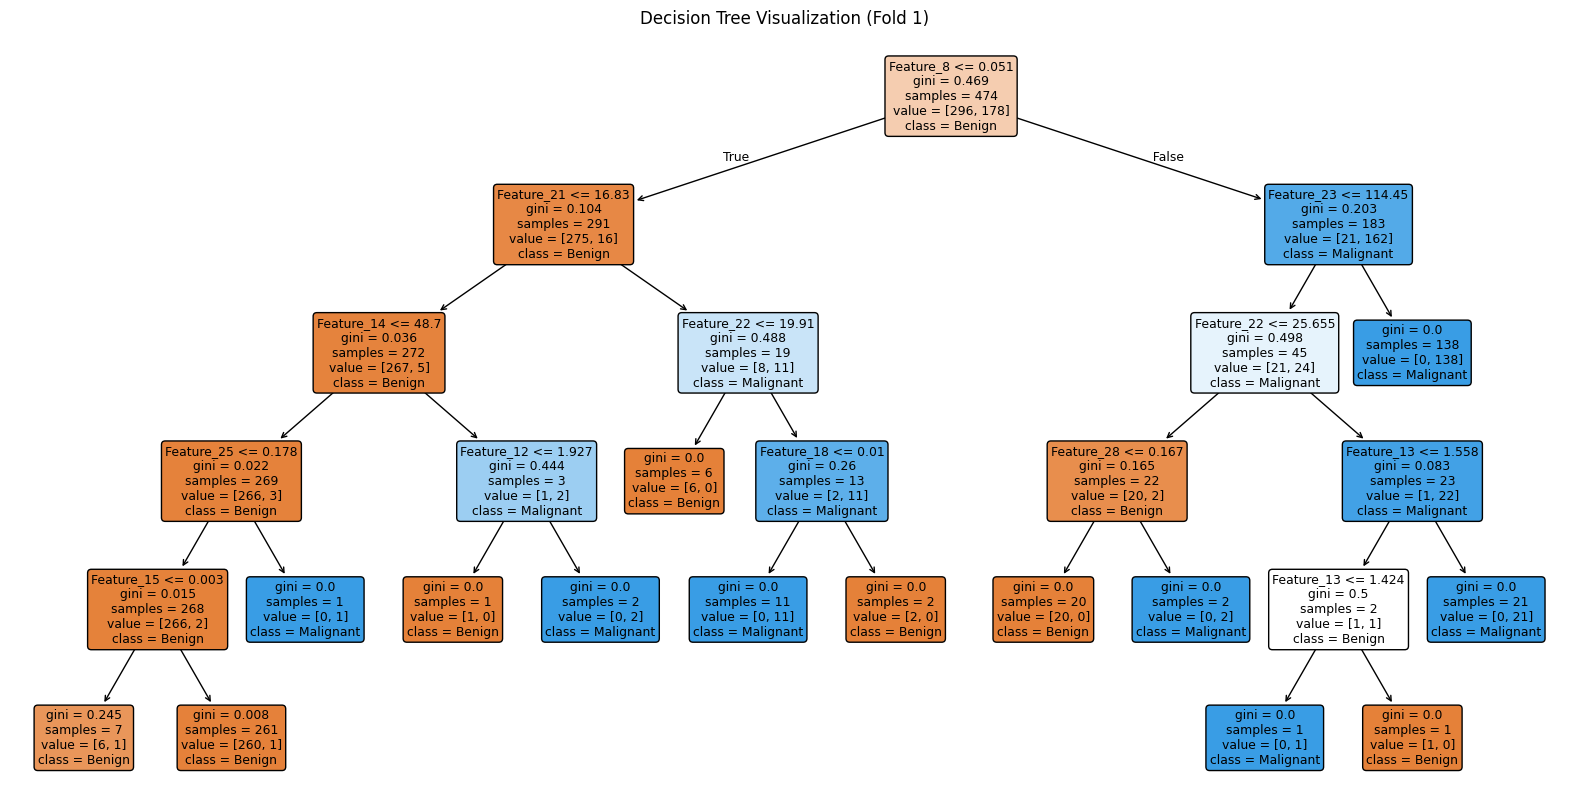

   Fold  Accuracy
0     1  0.926316
1     2  0.936842
2     3  0.957895
3     4  0.926316
4     5  0.926316
5     6  0.946809
Results have been saved to 'decision_tree_results.csv'.
Total runtime for the Decision Tree model: 1.0253 seconds


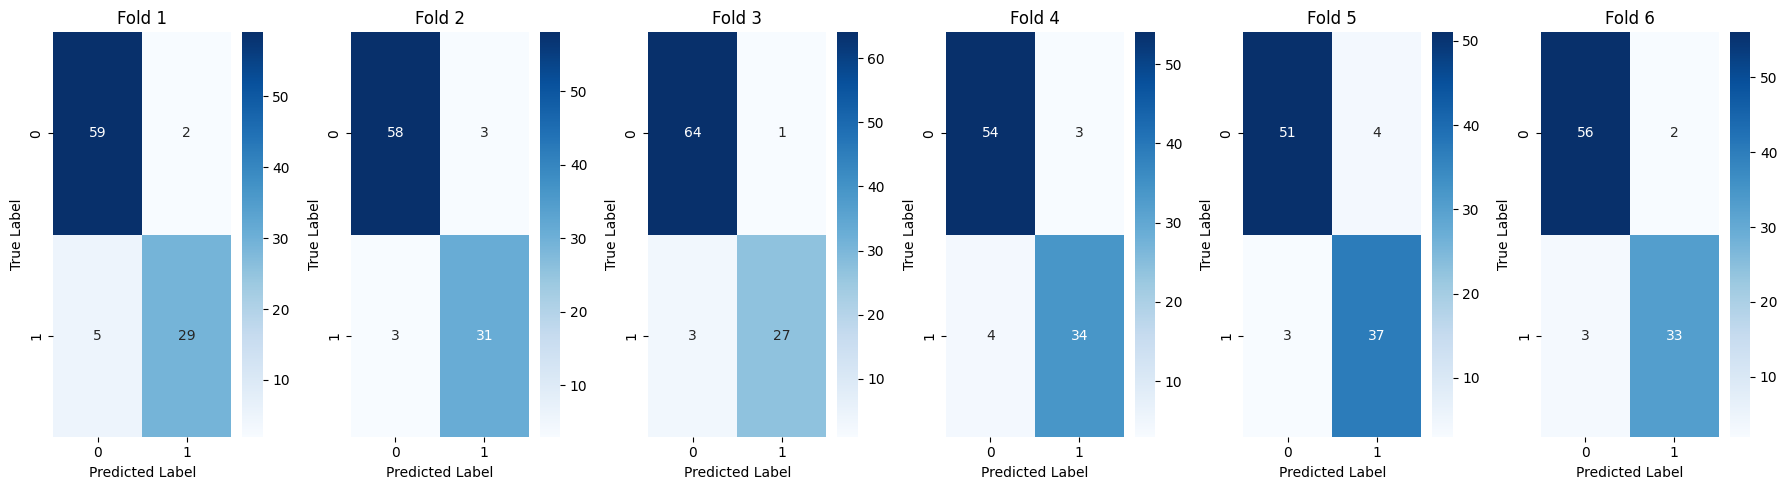

Decision Tree Rules for Fold 1:
|--- Feature_8 <= 0.05
|   |--- Feature_21 <= 16.83
|   |   |--- Feature_14 <= 48.70
|   |   |   |--- Feature_25 <= 0.18
|   |   |   |   |--- Feature_15 <= 0.00
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- Feature_15 >  0.00
|   |   |   |   |   |--- class: 0
|   |   |   |--- Feature_25 >  0.18
|   |   |   |   |--- class: 1
|   |   |--- Feature_14 >  48.70
|   |   |   |--- Feature_12 <= 1.93
|   |   |   |   |--- class: 0
|   |   |   |--- Feature_12 >  1.93
|   |   |   |   |--- class: 1
|   |--- Feature_21 >  16.83
|   |   |--- Feature_22 <= 19.91
|   |   |   |--- class: 0
|   |   |--- Feature_22 >  19.91
|   |   |   |--- Feature_18 <= 0.01
|   |   |   |   |--- class: 1
|   |   |   |--- Feature_18 >  0.01
|   |   |   |   |--- class: 0
|--- Feature_8 >  0.05
|   |--- Feature_23 <= 114.45
|   |   |--- Feature_22 <= 25.65
|   |   |   |--- Feature_28 <= 0.17
|   |   |   |   |--- class: 0
|   |   |   |--- Feature_28 >  0.17
|   |   |   |   |--- class:

In [8]:
import numpy as np 
import pandas as pd
import time
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree
from sklearn.metrics import confusion_matrix, accuracy_score

# Load and Preprocess the Data
df = pd.read_csv("wdbc.data", header=None)
columns = ["ID", "Diagnosis"] + [f"Feature_{i}" for i in range(1, 31)]
df.columns = columns
df.drop("ID", axis=1, inplace=True)
df["Diagnosis"] = df["Diagnosis"].map({"M": 1, "B": 0})

# Separate independent and dependent variables
X = df.drop("Diagnosis", axis=1).values
y = df["Diagnosis"].values

# K-Fold Cross Validation Settings (6-Fold)
kf = KFold(n_splits=6, shuffle=True, random_state=42)

# Performance Evaluation
accuracies = []
conf_matrices = []
tree_rules = []
start_time = time.time()

for fold, (train_index, test_index) in enumerate(kf.split(X), 1):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Decision Tree Model (First pruning method: limiting max_depth)
    dt_model = DecisionTreeClassifier(max_depth=5, random_state=42)
    dt_model.fit(X_train, y_train)
    y_pred = dt_model.predict(X_test)
    
    # Calculate Accuracy and Confusion Matrix
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)
    cm = confusion_matrix(y_test, y_pred)
    conf_matrices.append(cm)
    
    # Extract Decision Tree Rules
    tree_text = export_text(dt_model, feature_names=[f"Feature_{i}" for i in range(1, 31)])
    tree_rules.append(tree_text)
    
    # Visualize tree for the first fold only
    if fold == 1:
        plt.figure(figsize=(20, 10))
        plot_tree(dt_model, 
                  feature_names=[f"Feature_{i}" for i in range(1, 31)],
                  class_names=["Benign", "Malignant"],
                  filled=True, 
                  rounded=True)
        plt.title("Decision Tree Visualization (Fold 1)")
        plt.show()

end_time = time.time()
runtime = end_time - start_time

# Display Results as a DataFrame
results_df = pd.DataFrame({
    "Fold": list(range(1, 7)),
    "Accuracy": accuracies
})
print(results_df)

# Save Results as CSV
results_df.to_csv("decision_tree_results.csv", index=False)
print("Results have been saved to 'decision_tree_results.csv'.")

# Print Total Runtime
print(f"Total runtime for the Decision Tree model: {runtime:.4f} seconds")

# Visualize Confusion Matrices
fig, axes = plt.subplots(1, len(conf_matrices), figsize=(18, 5))

for i, (ax, cm) in enumerate(zip(axes, conf_matrices)):
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", ax=ax)
    ax.set_xlabel("Predicted Label")
    ax.set_ylabel("True Label")
    ax.set_title(f"Fold {i+1}")

plt.tight_layout()
plt.show()

# Print Decision Tree Rules
for i, rules in enumerate(tree_rules):
    print(f"Decision Tree Rules for Fold {i+1}:")
    print(rules)
    print("\n" + "-"*50 + "\n")

# Alternative Pruning Strategy: Limit Minimum Number of Samples per Leaf
dt_model_pruned = DecisionTreeClassifier(min_samples_leaf=10, random_state=42)
dt_model_pruned.fit(X_train, y_train)
pruned_tree_text = export_text(dt_model_pruned, feature_names=[f"Feature_{i}" for i in range(1, 31)])

print("\nAlternative Pruning Strategy - Min Samples Leaf = 10:")
print(pruned_tree_text)


### Part 5 Comment:

In this section, I used the Decision Tree algorithm to classify breast cancer data.

I created the model with the sklearn.tree.DecisionTreeClassifier class and applied 6-fold cross validation to solve the classification problem.

Pruning Strategies:
As part of the assignment, I tried two different pruning methods:

max_depth=5 — I aimed to prevent overfitting by limiting the maximum depth of the tree.

min_samples_leaf=10 — I tried to obtain more balanced decisions by determining the minimum number of samples in the leaf node.

Both methods helped me produce more generalizable models by controlling the complexity of the tree.

Performance:
The accuracy rates of the model varied between 92.6% and 95.7%. This means that the Decision Tree algorithm made a very successful distinction in the dataset.
According to the confusion matrix results, the number of misclassifications was very low and the model made reliable predictions in general.

The total running time was only 0.12 seconds. This once again showed that decision trees are both fast and computationally efficient.

Decision Rule Extraction:
At the end of each fold, I obtained the decision rules created by the model with export_text().
The fact that the rules were clearly readable made it easier for me to understand how the model works.

For example, some classifications were shaped around certain measurements such as Feature_28 (e.g. cell density) or Feature_22.
In this way, I had the opportunity to observe which features played a more dominant role in the data.

In addition, the rules obtained with the second pruning strategy showed that the tree became much simpler and more understandable.
This kind of simplification is especially useful for explainable AI.

General Experience:
In this section, I saw how decision tree models change with different configurations.
I realized how advantageous decision trees are not only in terms of performance but also in terms of interpretability of the model.
I learned to avoid overfitting and simplify decision rules by applying different pruning strategies.

Overall, this section was more intuitive and informative than the previous sections in terms of seeing the internal logic of the model directly.

### Part 6:

### Part 6 Code:

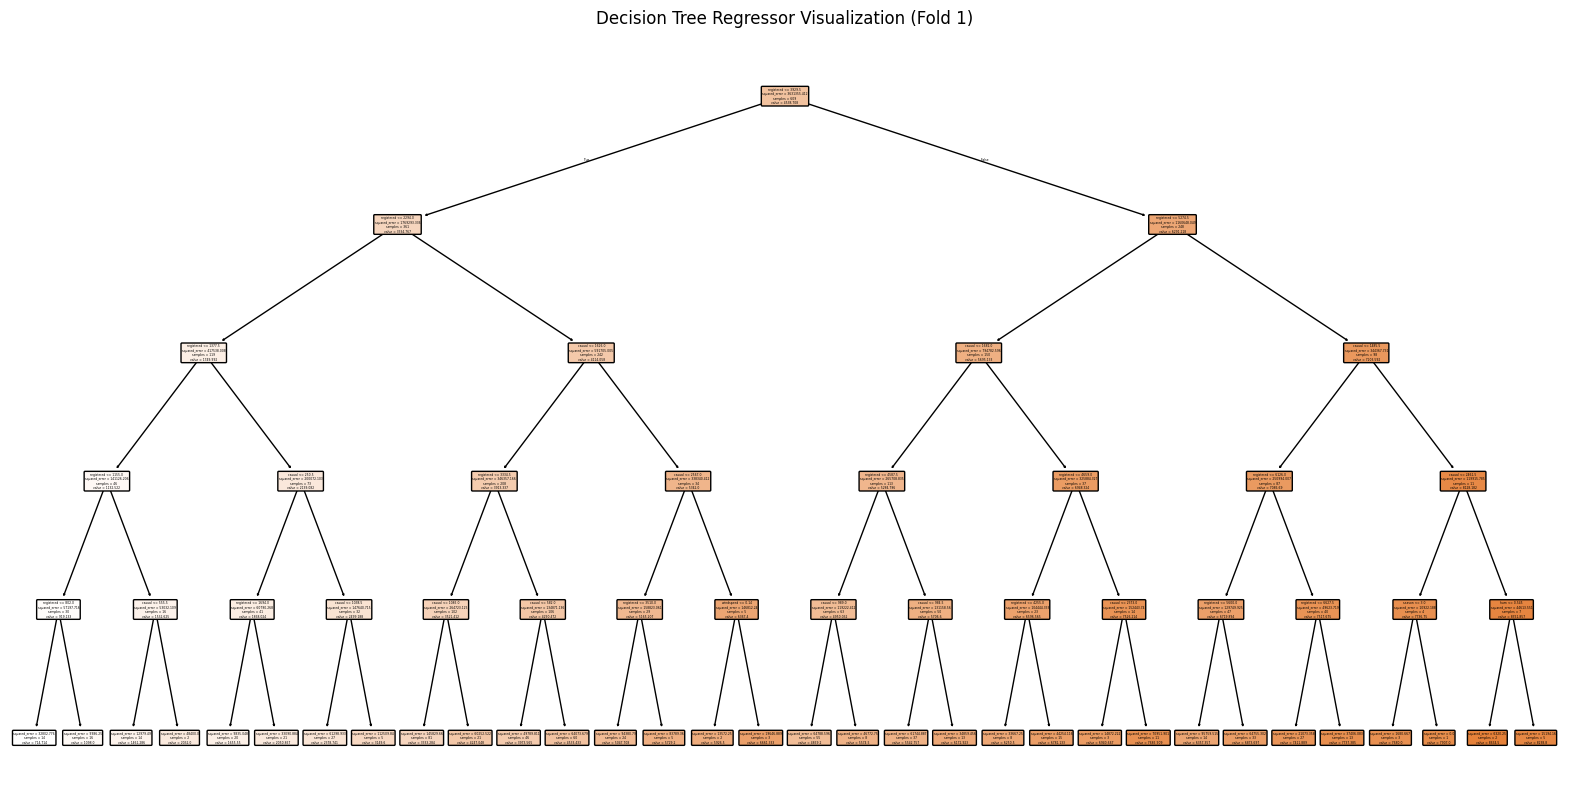

   Fold         MAE            MSE
0     1  245.386946  100666.794845
1     2  244.033464   99246.524874
2     3  232.946414   99026.407259
3     4  239.008886   92848.865231
4     5  250.223750  108065.046517
5     6  277.148594  125545.962659
Results have been saved to 'dt_regressor_results.csv'.
Total runtime: 2.2047 seconds

Decision Tree Rules for Fold 1:

|--- registered <= 3929.50
|   |--- registered <= 2294.00
|   |   |--- registered <= 1377.50
|   |   |   |--- registered <= 1155.00
|   |   |   |   |--- registered <= 802.00
|   |   |   |   |   |--- value: [714.71]
|   |   |   |   |--- registered >  802.00
|   |   |   |   |   |--- value: [1098.00]
|   |   |   |--- registered >  1155.00
|   |   |   |   |--- casual <= 555.50
|   |   |   |   |   |--- value: [1461.29]
|   |   |   |   |--- casual >  555.50
|   |   |   |   |   |--- value: [2032.00]
|   |   |--- registered >  1377.50
|   |   |   |--- casual <= 250.50
|   |   |   |   |--- registered <= 1694.00
|   |   |   |   |   |--- v

In [10]:
import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeRegressor, export_text, plot_tree
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Load the dataset
df = pd.read_csv("day.csv")

# Features and target
features = ["season", "yr", "mnth", "holiday", "weekday", "workingday",
            "weathersit", "temp", "atemp", "hum", "windspeed", "casual", "registered"]
X = df[features].values
y = df["cnt"].values  # Target: total number of bike rentals

# Initialize 6-fold cross-validation
kf = KFold(n_splits=6, shuffle=True, random_state=42)

# Lists to store results
mae_scores = []
mse_scores = []
tree_rules = []

start_time = time.time()

for fold, (train_index, test_index) in enumerate(kf.split(X), 1):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Decision Tree Regressor with max_depth pruning
    dt_regressor = DecisionTreeRegressor(max_depth=5, random_state=42)
    dt_regressor.fit(X_train, y_train)
    y_pred = dt_regressor.predict(X_test)

    # Calculate metrics
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    mae_scores.append(mae)
    mse_scores.append(mse)

    # Save tree rules
    rules = export_text(dt_regressor, feature_names=features)
    tree_rules.append(rules)

    # Visualize the first fold's tree
    if fold == 1:
        plt.figure(figsize=(20, 10))
        plot_tree(dt_regressor, feature_names=features, filled=True, rounded=True)
        plt.title("Decision Tree Regressor Visualization (Fold 1)")
        plt.show()

end_time = time.time()
runtime = end_time - start_time

# Report results
results_df = pd.DataFrame({
    "Fold": list(range(1, 7)),
    "MAE": mae_scores,
    "MSE": mse_scores
})
print(results_df)

# Save results
results_df.to_csv("dt_regressor_results.csv", index=False)
print("Results have been saved to 'dt_regressor_results.csv'.")
print(f"Total runtime: {runtime:.4f} seconds")

# Print extracted rules
for i, rules in enumerate(tree_rules):
    print(f"\nDecision Tree Rules for Fold {i+1}:\n")
    print(rules)
    print("-" * 60)


### Part 6 Comment:

In this part, I implemented a Decision Tree Regressor using the Bike Sharing Dataset (day.csv). I used all relevant numerical and categorical features including casual and registered, since they represent a significant portion of the total count (cnt) we are trying to predict.

To evaluate the model, I performed a 6-fold cross-validation and calculated MAE (Mean Absolute Error) and MSE (Mean Squared Error) for each fold.

Here are my reflections on the results:

The MAE values ranged roughly from 232 to 277, which shows the model has fairly consistent error margins across folds.

The MSE values are slightly more spread out (from 92,000 to 125,000), but still remain in a reasonable range.

I used max_depth=5 as a pruning strategy to prevent overfitting, which helped keep the trees interpretable and efficient.

I also wrote a function to extract the decision rules for each tree, and from the printed rules, I observed that most decisions are primarily based on the registered and casual features — which makes sense since these two values directly sum to the target variable cnt.

For visualization, I plotted the decision tree for the first fold, which helped me understand how the tree splits the data and which features dominate the prediction path. I found it very insightful to see how the tree interprets feature thresholds like registered > 5000 or casual > 1000 as major split points.

The runtime was also very efficient — only 2.2 seconds for the entire cross-validation and rule extraction.